# ALGORITHMIC TRADING (Infosys):
AUTHOR :SHUBHAM GONDRALWAR

DATE WRITTEN: 09-06-2020

# LETS GET STARTED

# IMPORTING REQUIRED LIBRARIES:

In [1]:
# WE WILL START BY IMPORTING ALL THE LIBRARIES REQUIRED FOR MODEL BUILDING.
import numpy as np # for numerical operation if any
import pandas as pd # mainly used for loading dataset and to handle dataframe operations
import matplotlib.pyplot as plt # for visulaisation
import seaborn as sns # for visulisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import math
import datetime
from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Loading Datasets.

In [2]:
infosys = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/infosys.csv")
infosys.head()

,Date,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close
0,03-01-2011,430.500000,187.527130,2808.076904,4745.200195,22436.20000,10398.09961,6134.500000,2652.870117,7964.02,11577.51
1,04-01-2011,432.125000,188.376862,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,8043.97,11670.75
2,05-01-2011,433.125000,189.634918,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,8022.18,11691.18
3,06-01-2011,435.000000,188.444839,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,8040.04,11722.89
4,07-01-2011,432.919006,189.455338,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,8000.90,11697.31


In [3]:
hongkong = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/hongkong.csv")#stock-market index in Hong Kong.
hongkong.head()
#hongkong.shape#stock-market index in Hong Kong dataset countains 2317 rows & 2 featurs.

,Date,hangopen
0,03-01-2011,23135.64063
1,04-01-2011,23477.31055
2,05-01-2011,23650.17969
3,06-01-2011,23861.22070
4,07-01-2011,23744.02930


In [6]:
austrilia = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/australia.csv")#Australian Securities Exchange
austrilia.head()#The open price & close price of Australian data set is same so we consider open price of the market. 
#austrilia.shape#Australian Securities Exchange dataset countains 2376 rows & 2 featurs.

,Date,austopen
0,31-12-2010,4787.500000
1,04-01-2011,4758.299805
2,05-01-2011,4738.600098
3,06-01-2011,4717.700195
4,07-01-2011,4717.799805


In [7]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#Japan's Nikkei 225 Stock Average.
nikkie.head()
#nikkie.shape#Japan's Nikkei 225 Stock Average dataset countains 2321 rows & 2 featurs.

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [8]:
sanghai = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/sanghai.csv")#China Stock Market
sanghai.head()
#sanghai.shape#China Stock Market dataset countains 2282 rows & 2 featurs.

,Date,sangaiopen
0,31-12-2010,2759.162109
1,04-01-2011,2825.329102
2,05-01-2011,2833.115967
3,06-01-2011,2838.435059
4,07-01-2011,2820.665039


In [9]:
nifty = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nifty50.csv")#Nifty50 Stock Market
nifty.head()
#nifty.shape#Nifty50 Stock Market dataset countains 2282 rows & 2 featurs.


,Date,niftyopen
0,31-12-2010,6105.100098
1,03-01-2011,6177.450195
2,04-01-2011,6172.750000
3,05-01-2011,6141.350098
4,06-01-2011,6107.000000


In [10]:
df1 = pd.merge(infosys,hongkong,how = "inner",on = "Date")
df2 = pd.merge(df1,austrilia,how = "inner",on = "Date")
df3 = pd.merge(df2,nifty,how = "inner",on = "Date")
df4 = pd.merge(df3,nikkie,how = "inner",on = "Date")
df5 = pd.merge(df4,sanghai,how = "inner",on = "Date")

In [12]:
infosys_main = df5 #changing the variable name

In [13]:
infosys_main.head()

,Date,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,04-01-2011,432.125000,188.376862,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,8043.97,11670.75,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102
1,05-01-2011,433.125000,189.634918,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,8022.18,11691.18,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967
2,06-01-2011,435.000000,188.444839,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,8040.04,11722.89,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059
3,07-01-2011,432.919006,189.455338,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,8000.90,11697.31,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039
4,11-01-2011,417.500000,184.966965,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,7966.09,11637.45,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074


In [14]:
infosys_main.tail()# checking the tail

,Date,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
1954,23-03-2020,540.0,577.341064,2870.342041,6690.600098,22805.07031,17011.52930,8745.450195,6879.520020,14053.23,29030.22,21696.13086,4753.899902,7945.700195,16570.57031,2677.590088
1955,24-03-2020,522.0,519.380066,2868.458984,6733.500000,21696.13086,16726.55078,7610.250000,6860.669922,14141.78,29297.64,22497.57031,4546.000000,7848.299805,17206.88086,2703.019043
1956,25-03-2020,597.0,581.879272,2875.417969,6735.700195,22663.49023,16552.83008,7801.049805,7417.859863,14183.20,29348.10,23255.91016,4735.700195,7735.149902,18446.80078,2775.302979
1957,26-03-2020,615.0,598.059082,2898.575928,6826.399902,23527.18945,16887.77930,8317.849609,7384.299805,14109.98,29196.04,23604.83008,4998.100098,8451.000000,19234.76953,2761.895996
1958,27-03-2020,NaN,634.364868,2883.738037,6817.600098,23352.33984,18092.34961,8641.450195,7797.540039,14110.24,29186.27,23768.41016,5113.299805,8949.099609,19021.97070,2792.983887


In [15]:
##Lets check the shape.
infosys_main.shape#After adding all  features in our Dataset, we get 1959 rows & 14 featurs. 

(1959, 16)

In [16]:
infosys_main.info()# checking the data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1958
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1959 non-null   object 
 1   infosysOpen       1958 non-null   float64
 2   infosysAdj Close  1953 non-null   float64
 3   sangaiclose       1958 non-null   float64
 4   aust close        1954 non-null   float64
 5   hangsangclose     1953 non-null   float64
 6   nkkiesclose       1945 non-null   float64
 7   nifty50 close     1944 non-null   float64
 8   usclose           1959 non-null   float64
 9   nyaClose          1959 non-null   float64
 10  dji Close         1959 non-null   float64
 11  hangopen          1955 non-null   float64
 12  austopen          1955 non-null   float64
 13  niftyopen         1951 non-null   float64
 14  nikkiesopen       1944 non-null   float64
 15  sangaiopen        1958 non-null   float64
dtypes: float64(15), object(1)
memory usage: 26

In [17]:
infosys_main.head()#checking head of escots dataset.

,Date,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,04-01-2011,432.125000,188.376862,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,8043.97,11670.75,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102
1,05-01-2011,433.125000,189.634918,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,8022.18,11691.18,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967
2,06-01-2011,435.000000,188.444839,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,8040.04,11722.89,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059
3,07-01-2011,432.919006,189.455338,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,8000.90,11697.31,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039
4,11-01-2011,417.500000,184.966965,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,7966.09,11637.45,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074


In [18]:
infosys_main.columns#checking columns name in final dataset.

Index(['Date', 'infosysOpen', 'infosysAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'nyaClose',
       'dji Close', 'hangopen', 'austopen', 'niftyopen', 'nikkiesopen',
       'sangaiopen'],
      dtype='object')

# MISSING VALUE ANALYISIS

In [19]:
#checking missing values.
infosys_main.isnull().sum()

Date                 0
infosysOpen          1
infosysAdj Close     6
sangaiclose          1
aust close           5
hangsangclose        6
nkkiesclose         14
nifty50 close       15
usclose              0
nyaClose             0
dji Close            0
hangopen             4
austopen             4
niftyopen            8
nikkiesopen         15
sangaiopen           1
dtype: int64

In [20]:
imputer = mdi.MeanMedianImputer(imputation_method='median')

In [21]:
imputer.fit(infosys_main)

MeanMedianImputer(imputation_method='median',
                  variables=['infosysOpen', 'infosysAdj Close', 'sangaiclose',
                             'aust close', 'hangsangclose', 'nkkiesclose',
                             'nifty50 close', 'usclose', 'nyaClose',
                             'dji Close', 'hangopen', 'austopen', 'niftyopen',
                             'nikkiesopen', 'sangaiopen'])

The median values for all the features are given below.

In [22]:
imputer.imputer_dict_

{'infosysOpen': 489.64999400000005,
 'infosysAdj Close': 420.981201,
 'sangaiclose': 2866.9239505,
 'aust close': 5423.5,
 'hangsangclose': 23422.51953,
 'nkkiesclose': 17210.05078,
 'nifty50 close': 8130.0,
 'usclose': 4862.569824,
 'nyaClose': 10683.94,
 'dji Close': 17647.75,
 'hangopen': 23406.99023,
 'austopen': 5431.299805,
 'niftyopen': 8134.350098000001,
 'nikkiesopen': 17154.570314999997,
 'sangaiopen': 2854.325073}

In [23]:
infosys_main = imputer.transform(infosys_main)
infosys_main.columns

Index(['Date', 'infosysOpen', 'infosysAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'nyaClose',
       'dji Close', 'hangopen', 'austopen', 'niftyopen', 'nikkiesopen',
       'sangaiopen'],
      dtype='object')

In [24]:
# checking missing values after filling.
infosys_main.isnull().sum()

Date                0
infosysOpen         0
infosysAdj Close    0
sangaiclose         0
aust close          0
hangsangclose       0
nkkiesclose         0
nifty50 close       0
usclose             0
nyaClose            0
dji Close           0
hangopen            0
austopen            0
niftyopen           0
nikkiesopen         0
sangaiopen          0
dtype: int64

In [25]:
infosys_main.describe().T #checking staticstical result of each feature. 

,count,mean,std,min,25%,50%,75%,max
infosysOpen,1959.0,496.534711,141.471973,270.000000,373.562500,489.649994,582.700012,843.299988
infosysAdj Close,1959.0,397.548378,189.389603,126.169083,192.582733,420.981201,514.667633,810.035217
sangaiclose,1959.0,2804.002373,543.623881,1950.011963,2318.767578,2866.923951,3137.102417,5166.350098
aust close,1959.0,5382.026543,684.173622,3863.899902,4943.250000,5423.500000,5842.199951,6864.000000
hangsangclose,1959.0,24135.903289,3249.934644,16250.269530,21882.315430,23422.519530,26715.884765,33154.121090
nkkiesclose,1959.0,16650.755545,4794.100487,8160.009766,13385.875000,17210.050780,20659.785155,24270.619140
nifty50 close,1959.0,8131.170092,2213.182738,4544.200195,5899.675049,8130.000000,10213.274905,12362.299810
usclose,1959.0,5112.634385,1862.035934,2341.840088,3324.775024,4862.569824,6803.064942,9817.179688
nyaClose,1959.0,10539.403925,1778.583650,6726.620000,9145.585000,10683.940000,12051.920000,14183.200000
dji Close,1959.0,18513.147213,4888.088690,10719.940000,14787.965000,17647.750000,22977.200000,29348.100000


AS WE ARE GOING TO DO MODEL BUILDING WITH BASIC LINEAR REGRESSION WITH REGULARISATION SO SCALING AND DISTRIBUTION OF THE FEATURES MUST BE NORMAL.

# Outlier Analysis-

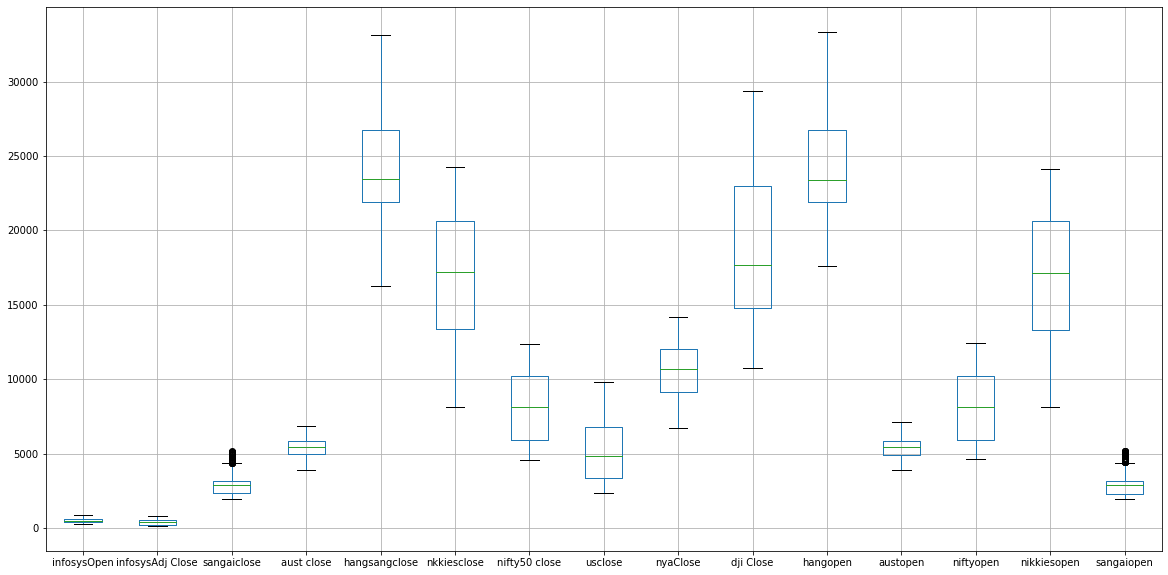

In [26]:
infosys_main.boxplot(figsize=(20,10)) 

In [27]:
infosys_main = infosys_main.drop(["Date"],axis = 1)

AS IT CAN BE CLEARLY SEEN THAT OUTLIERS ARE PRESENT IN SOME FEATURES, SINCE LINEAR MODELS ARE SUSEPTABLE TO OUTLIERS WHICH CAN HAVE NEGATIVE IMPACT ON FINDING BEST FIT LINE SO IT IS ALWAYS BETTER TO REMOVE OUTLIERS.

In [28]:
def outlierhandle(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
for column in infosys_main.columns:
    lr,ur=outlierhandle(infosys_main[column])
    infosys_main[column]=np.where(infosys_main[column]>ur,ur,infosys_main[column])
    infosys_main[column]=np.where(infosys_main[column]<lr,lr,infosys_main[column])

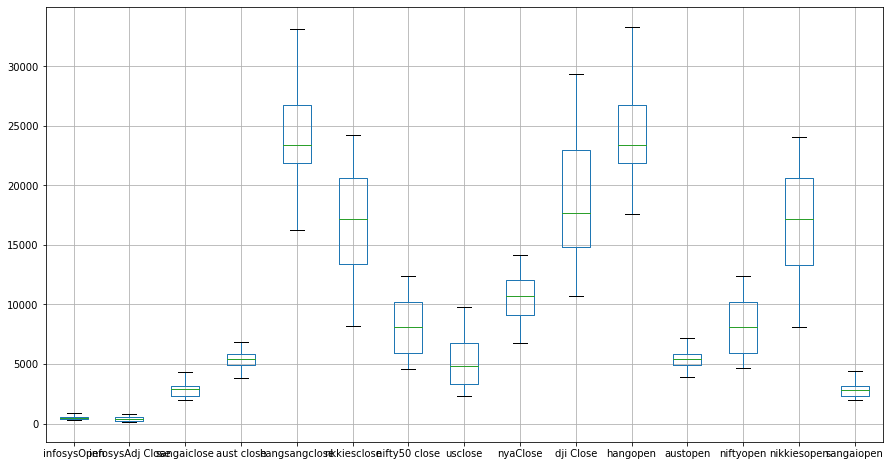

In [30]:
infosys_main.boxplot(figsize=(15,8))# After treating outlier.

In [31]:
infosys_main.head()

,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,432.125000,188.376862,2808.076904,4742.500000,23436.05078,10380.76953,6157.600098,2691.520020,8043.97,11670.75,23477.31055,4758.299805,6172.750000,10352.19043,2825.329102
1,433.125000,189.634918,2852.647949,4714.899902,23668.48047,10529.75977,6146.350098,2681.250000,8022.18,11691.18,23650.17969,4738.600098,6141.350098,10387.95020,2833.115967
2,435.000000,188.444839,2839.220947,4725.000000,23757.82031,10541.04004,6079.799805,2702.199951,8040.04,11722.89,23861.22070,4717.700195,6107.000000,10477.51953,2838.435059
3,432.919006,189.455338,2824.197021,4705.000000,23786.30078,10510.67969,6048.250000,2709.889893,8000.90,11697.31,23744.02930,4717.799805,6030.899902,10506.71973,2820.665039
4,417.500000,184.966965,2791.809082,4710.700195,23527.25977,10589.75977,5762.850098,2707.800049,7966.09,11637.45,23606.75977,4709.299805,5767.950195,10484.62012,2783.476074


In [32]:
infosys_main.columns

Index(['infosysOpen', 'infosysAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'nyaClose',
       'dji Close', 'hangopen', 'austopen', 'niftyopen', 'nikkiesopen',
       'sangaiopen'],
      dtype='object')

In [33]:
#sns.pairplot(infosys_main,diag_kind='kde')

# FEATURE SELECTION AND MODEL BUILDING

In [34]:
correlation = infosys_main.corr() 
correlation

,infosysOpen,infosysAdj Close,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
infosysOpen,1.000000,0.978426,0.466498,0.832813,0.629455,0.836227,0.889844,0.895533,0.841089,0.874440,0.631149,0.848807,0.891074,0.842073,0.464148
infosysAdj Close,0.978426,1.000000,0.483804,0.863456,0.666981,0.886878,0.940442,0.947060,0.891054,0.928940,0.666803,0.871147,0.937676,0.890668,0.488522
sangaiclose,0.466498,0.483804,1.000000,0.457233,0.477039,0.593489,0.522358,0.450547,0.454532,0.401444,0.475990,0.460020,0.524630,0.590949,0.936966
aust close,0.832813,0.863456,0.457233,1.000000,0.778563,0.908585,0.900108,0.914102,0.962537,0.922686,0.780474,0.945352,0.902137,0.908733,0.461348
hangsangclose,0.629455,0.666981,0.477039,0.778563,1.000000,0.791346,0.821044,0.802716,0.815570,0.798951,0.988571,0.810904,0.823448,0.789236,0.505453
nkkiesclose,0.836227,0.886878,0.593489,0.908585,0.791346,1.000000,0.926501,0.923849,0.942853,0.905224,0.791231,0.911908,0.929353,0.987083,0.608180
nifty50 close,0.889844,0.940442,0.522358,0.900108,0.821044,0.926501,1.000000,0.974355,0.940093,0.957399,0.821063,0.919701,0.993561,0.927866,0.527534
usclose,0.895533,0.947060,0.450547,0.914102,0.802716,0.923849,0.974355,1.000000,0.950997,0.985017,0.802868,0.920281,0.975657,0.925328,0.473383
nyaClose,0.841089,0.891054,0.454532,0.962537,0.815570,0.942853,0.940093,0.950997,1.000000,0.965443,0.815284,0.928085,0.941291,0.942793,0.469913
dji Close,0.874440,0.928940,0.401444,0.922686,0.798951,0.905224,0.957399,0.985017,0.965443,1.000000,0.797194,0.897858,0.958293,0.905884,0.421243


In [35]:
cortarget = abs(correlation["infosysOpen"])
features = cortarget[cortarget>0.7]
features

infosysOpen         1.000000
infosysAdj Close    0.978426
aust close          0.832813
nkkiesclose         0.836227
nifty50 close       0.889844
usclose             0.895533
nyaClose            0.841089
dji Close           0.874440
austopen            0.848807
niftyopen           0.891074
nikkiesopen         0.842073
Name: infosysOpen, dtype: float64

In [36]:
Y = infosys_main['infosysOpen']

In [37]:
infosys_main.columns

Index(['infosysOpen', 'infosysAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'nyaClose',
       'dji Close', 'hangopen', 'austopen', 'niftyopen', 'nikkiesopen',
       'sangaiopen'],
      dtype='object')

To avoid the problem of multicolinearity droping highely correlated independent features is better while bulding the model.

In [39]:
X=infosys_main.drop(['nikkiesopen','infosysOpen','sangaiclose','sangaiopen','hangopen','niftyopen','austopen','nyaClose','aust close'] , axis=1)
   

In [40]:
X.columns

Index(['infosysAdj Close', 'hangsangclose', 'nkkiesclose', 'nifty50 close',
       'usclose', 'dji Close'],
      dtype='object')

# Building Linear Regression.
 

# splitting the data into train and test.

In [42]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state =35)

# Grid search CV to get best hyperparameters:

In [43]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_cv = GridSearchCV(model,parameters, cv=20)
grid_cv.fit(X_train, y_train)
print("r2 / variance : ", grid_cv.best_score_)
print("bestparameters : ", grid_cv.best_params_)


r2 / variance :  0.9713580339723334
bestparameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [44]:
model = LinearRegression(n_jobs=-1,copy_X= True, fit_intercept=True, normalize= True)


In [45]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [46]:
X_test.head()

,infosysAdj Close,hangsangclose,nkkiesclose,nifty50 close,usclose,dji Close
794,367.515533,23333.17969,15329.91016,7748.200195,4466.750000,16945.80
857,406.346436,24679.75977,18004.76953,8797.400391,4650.470215,17584.52
720,284.461487,22880.64063,15095.00000,7542.100098,4247.950195,16698.74
737,295.471558,23387.14063,15284.41992,7585.000000,4350.350098,16818.13
899,405.451874,27827.69922,20058.94922,8448.099609,4994.600098,18116.04


In [47]:
y_pred = model.predict(X_test)# predicting the output value.

In [48]:
yhat = model.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.9730627283327401 0.9729706875411663


# 97% of the varience is explained by the model so it is better to use linear regression for output prediction:

In [49]:
y_pred = model.predict(X_test)

In [50]:
X_test["actualstock"] = y_test

In [51]:
X_test["predictedstock"]=y_pred

In [52]:
X_test

,infosysAdj Close,hangsangclose,nkkiesclose,nifty50 close,usclose,dji Close,actualstock,predictedstock
794,367.515533,23333.17969,15329.910160,7748.200195,4466.750000,16945.80,483.112000,480.847308
857,406.346436,24679.75977,18004.769530,8797.400391,4650.470215,17584.52,534.213013,503.737094
720,284.461487,22880.64063,15095.000000,7542.100098,4247.950195,16698.74,398.250000,393.453064
737,295.471558,23387.14063,15284.419920,7585.000000,4350.350098,16818.13,414.375000,406.747113
899,405.451874,27827.69922,20058.949220,8448.099609,4994.600098,18116.04,537.000000,523.699399
...,...,...,...,...,...,...,...,...
1153,514.281921,20880.50000,16681.890630,8370.700195,4862.569824,17873.22,592.500000,600.498708
1598,608.627014,28117.41992,22196.890630,10947.250000,7716.609863,24886.81,658.775024,639.113452
99,165.905228,22398.09961,9868.070313,5526.600098,2652.889893,11934.58,358.756012,346.553755
1892,686.998352,26954.00000,23148.570310,12056.049810,8479.019531,26970.71,703.099976,675.967857


# Testing for april and may month:

In [56]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/Live test data for  infosys.csv")
test.head()

,Date,infosysAdj Close,infosysAdj open,austopen,austclose,hangsangopen,hangsangClose,nikkiesopen,nikkies Close,niftyopen,niftyClose,usopen,usclose,nyaopen,nyaClose,djiopen,dji Close
0,08-04-20,630.42,630.00,5252.299805,5252.299805,24191.32031,24253.28906,19047.75977,18950.17969,8688.900391,8792.200195,7975.720215,7887.259766,10894.20,10537.04,22893.47070,22653.85938
1,13-04-20,627.71,629.00,5488.100100,5387.299805,24185.32400,24300.30000,19312.03906,19498.50000,9103.950195,9111.900391,8127.689941,8153.580078,11136.61,11136.61,23698.92969,23719.36914
2,16-04-20,630.47,619.95,5466.700195,5466.700195,24025.44922,24145.33984,19311.30078,19550.08984,8851.250000,8925.299805,8479.110352,8393.179688,10882.83,10843.92,23543.66016,23504.34961
3,22-04-20,624.70,633.20,5221.299805,5221.299805,23540.53906,23793.55078,19109.17969,19280.77930,9026.750000,8981.450195,8434.549805,8263.230469,10919.97,10706.44,23437.33984,23018.88086
4,23-04-20,633.23,647.05,5221.200195,5221.200195,23983.65039,23893.35938,19313.03906,19137.94922,9232.349609,9187.299805,8528.839844,8495.379883,10961.24,10908.56,23543.08984,23475.82031


In [57]:
teststock_open = test["infosysAdj open"]


In [58]:
date = test["Date"]

In [59]:
test = test.drop(['Date','infosysAdj open','hangsangopen','niftyopen','nikkiesopen','usopen','austopen','nyaopen','djiopen','nyaClose','austclose'],axis = 1)

In [60]:
test.head()

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,dji Close
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,22653.85938
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,23719.36914
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,23504.34961
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,23018.88086
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,23475.82031


In [61]:
test.isnull().sum()

infosysAdj Close    0
hangsangClose       0
nikkies Close       0
niftyClose          0
usclose             0
dji Close           0
dtype: int64

In [62]:
predlive = model.predict(test)
predlive

array([689.03662334, 671.57796351, 675.28027201, 669.19414088,
       671.29384954, 709.53178628, 690.4894066 , 688.12746095,
       699.26731949, 692.14336757, 688.85865589, 707.19220936,
       682.31616855, 674.5248606 , 696.84787565, 690.39974887,
       693.08802924, 705.08925733])

In [63]:
test["actual_live_price"] = teststock_open 

In [64]:
test["predicted_live_linear"] = predlive

In [65]:
test

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,dji Close,actual_live_price,predicted_live_linear
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,22653.85938,630.00,689.036623
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,23719.36914,629.00,671.577964
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,23504.34961,619.95,675.280272
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,23018.88086,633.20,669.194141
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,23475.82031,647.05,671.293850
5,670.18,23977.32031,19429.43945,9313.900391,8494.750000,23515.25977,668.55,709.531786
6,655.67,24280.14063,19783.22070,9282.299805,8730.160156,24133.77930,673.00,690.489407
7,651.83,24575.96094,19785.34560,9380.900391,8607.730469,24101.55078,666.00,688.127461
8,664.65,23868.66016,19619.98000,9205.599609,8809.120117,23883.08984,676.90,699.267319
9,656.96,24137.48047,19619.34961,9270.900391,8854.389648,23664.64063,665.55,692.143368


In [68]:
mean_squared_error(test["actual_live_price"],test["predicted_live_linear"])**0.5

31.086695229625338

# May and june dateset:

In [70]:
test1 = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/infosys live test.csv")
test1.head(20)

,infosysAdj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,Date,infosys open
0,695.98,5775.0,23301.36,21419.23,9314.95,9412.36,11837.53,25548.27,28-05-20,707.00
1,697.90,5851.1,23132.76,21916.31,9490.10,9368.99,11804.91,25400.64,29-05-20,692.50
2,691.00,5755.1,22961.47,21877.89,9580.30,9489.97,11802.95,25383.11,01-06-20,698.75
3,699.55,5819.2,23732.52,22062.39,9826.15,9552.05,11900.24,25475.02,02-06-20,700.50
4,708.10,5835.1,23995.94,22325.61,9979.10,9608.38,12064.41,25742.65,03-06-20,710.70
5,701.55,5941.6,24325.62,22613.76,10061.55,9682.91,12302.91,26269.89,04-06-20,702.00


In [71]:
test1.columns

Index(['infosysAdj Close', 'aust close', 'hangsangclose', 'nkkiesclose',
       'nifty50 close', 'usclose', 'nyaClose', 'dji Close', 'Date',
       'infosys open'],
      dtype='object')

In [72]:
teststock_open = test1["infosys open"]


In [73]:
date = test1["Date"]

In [74]:
test1 = test1.drop(['Date','infosys open','nyaClose','aust close'],axis = 1)


In [75]:
test1.head()

,infosysAdj Close,hangsangclose,nkkiesclose,nifty50 close,usclose,dji Close
0,695.98,23301.36,21419.23,9314.95,9412.36,25548.27
1,697.90,23132.76,21916.31,9490.10,9368.99,25400.64
2,691.00,22961.47,21877.89,9580.30,9489.97,25383.11
3,699.55,23732.52,22062.39,9826.15,9552.05,25475.02
4,708.10,23995.94,22325.61,9979.10,9608.38,25742.65


In [76]:
predlive = model.predict(test1)
predlive

array([709.63488561, 707.13430289, 695.33690057, 704.68566762,
       710.92340221, 700.95297798])

In [77]:
test1["actual_live_price"] = teststock_open 

In [78]:
test1["predicted_live_linear"] = predlive

In [79]:
test1["DATE"]=date

In [80]:
test1

,infosysAdj Close,hangsangclose,nkkiesclose,nifty50 close,usclose,dji Close,actual_live_price,predicted_live_linear,DATE
0,695.98,23301.36,21419.23,9314.95,9412.36,25548.27,707.00,709.634886,28-05-20
1,697.90,23132.76,21916.31,9490.10,9368.99,25400.64,692.50,707.134303,29-05-20
2,691.00,22961.47,21877.89,9580.30,9489.97,25383.11,698.75,695.336901,01-06-20
3,699.55,23732.52,22062.39,9826.15,9552.05,25475.02,700.50,704.685668,02-06-20
4,708.10,23995.94,22325.61,9979.10,9608.38,25742.65,710.70,710.923402,03-06-20
5,701.55,24325.62,22613.76,10061.55,9682.91,26269.89,702.00,700.952978,04-06-20


# PREDICTION FOR JUNE 9(ACTUAL IS 720RS):

In [81]:
pred=model.predict([[720.85,24776.77,23178.10,10167.45,9814.08,27110.98]])
pred

array([717.43269029])

In [82]:
print("The root mean squared error is:",(mean_squared_error(test1["actual_live_price"],test1["predicted_live_linear"])))


The root mean squared error is: 41.903444670690014


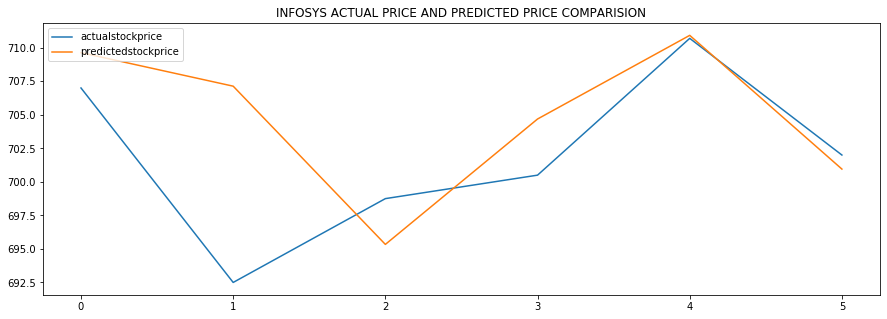

In [83]:
plt.figure(figsize = (15,5))
plt.plot(test1["actual_live_price"])
plt.plot(test1["predicted_live_linear"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("INFOSYS ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# It can be clearly seen that there is some deviation in the prediction for the iniatial value but the model is performing excellent latest dataset:

In [85]:
import pickle
pickle.dump(model,open('info.pickle','wb'))
infofysis_pickle = pickle.load(open('info.pickle','rb'))

# Model building using Ridge and Lasso Regression.


In [86]:
from sklearn.linear_model import Lasso,Ridge

# Applying Ridge Regression.

# Tuning parameters to get hyperparameters:

In [204]:
from sklearn.linear_model import Ridge
parameters={'alpha':[0.00000002,0.00000001,2,5,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,12,56,20,42,35,550],'normalize':[True,False]}
ridge  = Ridge(max_iter=1000000)
ridge_regressor=GridSearchCV(ridge,parameters,cv=20)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000000, normalize=False,
                             random_state=None, solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [2e-08, 1e-08, 2, 5, 1e-10, 1e-08, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   100],
                         'normalize': [True, False],
                         'random_state': [1, 12, 56, 20, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [205]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100, 'normalize': False, 'random_state': 1}
0.9726321791522264


In [206]:
ridge = Ridge(max_iter=1000000,alpha=100, normalize=False, random_state= 1,fit_intercept=True)
ridge.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000000,
      normalize=False, random_state=1, solver='auto', tol=0.001)

In [207]:
x_test_ridge = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [208]:
pred = ridge.predict(x_test_ridge)

In [209]:
mean_squared_error(pred,y_test)# checking missing squred error 455.0561

455.0561669524718

# APPLYING ENSEMBLE TECHNIQUE


In [210]:
#loading required library
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

In [211]:
infosys_main.columns

Index(['infosysOpen', 'infosysAdj Close', 'sangaiclose', 'aust close',
       'hangsangclose', 'nkkiesclose', 'nifty50 close', 'usclose', 'nyaClose',
       'dji Close', 'hangopen', 'austopen', 'niftyopen', 'nikkiesopen',
       'sangaiopen', 'nyaOpen', 'djiOpen', 'month', 'day', 'year'],
      dtype='object')

In [212]:
infosys_main = infosys_main.drop(['sangaiclose','niftyopen','nikkiesopen','hangopen','day','month','year','austopen','sangaiopen','nyaOpen','djiOpen',"aust close","aust close"],axis=1)

In [213]:
Y = infosys_main["infosysOpen"]

In [214]:
X = infosys_main.drop(["infosysOpen"],axis = 1)

In [215]:
X

,infosysAdj Close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close
0,188.376862,23436.05078,10380.76953,6157.600098,2691.520020,8043.97,11670.75
1,189.634918,23668.48047,10529.75977,6146.350098,2681.250000,8022.18,11691.18
2,188.444839,23757.82031,10541.04004,6079.799805,2702.199951,8040.04,11722.89
3,189.455338,23786.30078,10510.67969,6048.250000,2709.889893,8000.90,11697.31
4,184.966965,23527.25977,10589.75977,5762.850098,2707.800049,7966.09,11637.45
5,181.151093,23760.33984,10499.04004,5754.100098,2716.830078,8018.68,11671.88
6,183.962189,24125.60938,10502.86035,5863.250000,2737.330078,8122.98,11755.44
7,174.587585,24238.98047,10518.98047,5751.899902,2735.290039,8119.43,11731.90
8,178.051956,24156.97070,10437.30957,5654.750000,2765.850098,8190.91,11837.93
9,181.004181,24153.98047,10274.51953,5724.049805,2725.360107,8104.92,11825.29


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state =35) # spliting  into  train & test.


# Ensemble technique(combiantion of linear regression, ridge and desicion tree regressor)

In [217]:
kfold = model_selection.KFold(n_splits=20,random_state= 50)

In [218]:
estimator = []
model1 = LinearRegression(normalize=True,fit_intercept=True,n_jobs=-1)
estimator.append(('Linear',model1))
model2 = Ridge(alpha=0.0001,
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    max_iter=100000,
    tol=0.000001,
    solver='cholesky',
    random_state=35)
estimator.append(('ridge',model2))
model3 = DecisionTreeRegressor(max_depth=40)
estimator.append(('desiciontree',model3))

In [219]:
#creating ensemble model
ensemble = VotingRegressor(estimator)
result = model_selection.cross_val_score(ensemble,X_train,y_train,cv =kfold)

In [220]:
result.mean()

0.9858651498188854

In [221]:
ensemble=ensemble.fit(X_train,y_train)

In [222]:
predic_value=ensemble.predict(X_test)


In [223]:
(mean_squared_error(predic_value,y_test))

201.86994142603305

In [224]:
test.head()

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,dji Close,actual_live_price,predicted_live_linear
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,22653.85938,630.00,689.132126
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,23719.36914,629.00,671.958823
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,23504.34961,619.95,675.494706
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,23018.88086,633.20,669.167155
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,23475.82031,647.05,671.269811


# Testing april and may dataset:

In [225]:
test=pd.read_csv('F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/Live test data for  infosys.csv')

In [226]:
test.head()

,Date,infosysAdj Close,infosysAdj open,austopen,austclose,hangsangopen,hangsangClose,nikkiesopen,nikkies Close,niftyopen,niftyClose,usopen,usclose,nyaopen,nyaClose,djiopen,dji Close
0,08-04-20,630.42,630.00,5252.299805,5252.299805,24191.32031,24253.28906,19047.75977,18950.17969,8688.900391,8792.200195,7975.720215,7887.259766,10894.20,10537.04,22893.47070,22653.85938
1,13-04-20,627.71,629.00,5488.100100,5387.299805,24185.32400,24300.30000,19312.03906,19498.50000,9103.950195,9111.900391,8127.689941,8153.580078,11136.61,11136.61,23698.92969,23719.36914
2,16-04-20,630.47,619.95,5466.700195,5466.700195,24025.44922,24145.33984,19311.30078,19550.08984,8851.250000,8925.299805,8479.110352,8393.179688,10882.83,10843.92,23543.66016,23504.34961
3,22-04-20,624.70,633.20,5221.299805,5221.299805,23540.53906,23793.55078,19109.17969,19280.77930,9026.750000,8981.450195,8434.549805,8263.230469,10919.97,10706.44,23437.33984,23018.88086
4,23-04-20,633.23,647.05,5221.200195,5221.200195,23983.65039,23893.35938,19313.03906,19137.94922,9232.349609,9187.299805,8528.839844,8495.379883,10961.24,10908.56,23543.08984,23475.82031


In [227]:
test.columns

Index(['Date', 'infosysAdj Close', 'infosysAdj open', 'austopen', 'austclose',
       'hangsangopen', 'hangsangClose', 'nikkiesopen', 'nikkies Close',
       'niftyopen', 'niftyClose', 'usopen', 'usclose', 'nyaopen', 'nyaClose',
       'djiopen', 'dji Close'],
      dtype='object')

In [228]:
en_target=test["infosysAdj open"]

In [229]:
date = test["Date"]

In [230]:
en_feature=test.drop(['Date','infosysAdj open','hangsangopen','niftyopen','nikkiesopen','usopen','austopen','nyaopen','djiopen','austclose'],axis=1)

In [231]:
pred=ensemble.predict(en_feature)

In [232]:
en_feature["actual_live_price"] = en_target

In [233]:
en_feature["predicted_live_linear"] = pred

In [234]:
en_feature

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,nyaClose,dji Close,actual_live_price,predicted_live_linear
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,10537.04,22653.85938,630.00,679.266799
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,11136.61,23719.36914,629.00,667.156442
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,10843.92,23504.34961,619.95,671.496824
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,10706.44,23018.88086,633.20,664.604276
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,10908.56,23475.82031,647.05,673.310952
5,670.18,23977.32031,19429.43945,9313.900391,8494.750000,10916.68,23515.25977,668.55,701.160605
6,655.67,24280.14063,19783.22070,9282.299805,8730.160156,11264.84,24133.77930,673.00,692.007093
7,651.83,24575.96094,19785.34560,9380.900391,8607.730469,11319.70,24101.55078,666.00,690.342320
8,664.65,23868.66016,19619.98000,9205.599609,8809.120117,11135.40,23883.08984,676.90,696.629122
9,656.96,24137.48047,19619.34961,9270.900391,8854.389648,10999.99,23664.64063,665.55,692.905902


In [235]:
mean_squared_error(en_feature['actual_live_price'],en_feature['predicted_live_linear'])

880.249364664938

# Adaboosting regressor

In [236]:
from sklearn.ensemble import AdaBoostRegressor

# Tuning hyperparametrs

In [237]:
param = {"n_estimators":[10,20,30,40,50, 60,36],"learning_rate":[0.00000002,1e-10,1e-8,1e-3,1e-2],"loss":['linear','square','exponential']}
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True))
gridada = GridSearchCV(adamodel,param,cv=5)
gridada.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=True),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [2e-08, 1e-10, 1e-08, 0.001, 0.01],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 36]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [238]:
print(gridada.best_params_)
print(gridada.best_score_)

{'learning_rate': 1e-10, 'loss': 'square', 'n_estimators': 10}
0.9752164370450607


In [239]:
ada_model =AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1e-10, loss= 'square', n_estimators= 50)

In [240]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1e-10, loss='square', n_estimators=50,
                  ran

In [241]:
pred_ada = ada_model.predict(X_test)

In [242]:
mean_squared_error(pred_ada,y_test)

112.41113105793276

In [243]:
ada_test=test.drop(['Date','infosysAdj open','hangsangopen','niftyopen','nikkiesopen','usopen','austopen','nyaopen','djiopen',"austclose"],axis=1)

In [244]:
en_target.head()

0    630.00
1    629.00
2    619.95
3    633.20
4    647.05
Name: infosysAdj open, dtype: float64

In [245]:
pred=ada_model.predict(ada_test)
pred

array([673.150024, 663.      , 673.150024, 663.      , 681.599976,
       703.799988, 695.      , 689.700012, 703.799988, 695.      ,
       695.      , 709.      , 689.5     , 685.900024, 706.400024,
       706.400024, 706.400024, 719.150024])

In [246]:
mean_squared_error(pred,en_target)

1069.099293933614

# Bulding with decision trees i.e Rndom forest regressor:

In [247]:
from sklearn.ensemble import RandomForestRegressor

In [248]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for finding the best hyperparameters.

In [277]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [278]:
model =RandomForestRegressor()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2) 
grid_search.fit(X_train, y_train)                         


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 19.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True, False],
     

In [280]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'bootstrap': False, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.9950495793003168


In [306]:
rf=RandomForestRegressor(n_estimators=30, random_state=35,max_depth=50, n_jobs=-1,)

In [307]:
X_train.columns

Index(['infosysAdj Close', 'hangsangclose', 'nkkiesclose', 'nifty50 close',
       'usclose', 'nyaClose', 'dji Close'],
      dtype='object')

In [308]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                      oob_score=False, random_state=35, verbose=0,
                      warm_start=False)

In [309]:
predic_value=rf.predict(X_test)


In [310]:
X_train.columns

Index(['infosysAdj Close', 'hangsangclose', 'nkkiesclose', 'nifty50 close',
       'usclose', 'nyaClose', 'dji Close'],
      dtype='object')

In [311]:
mean_squared_error(predic_value,y_test)

83.82075429966206

In [312]:
#import pickle
#pickle.dump(rf,open('rf.pickle','wb'))
#sbi_picklemodel = pickle.load(open('rf.pickle','rb'))

# Testing on april and may dataset:

In [313]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/Live test data for  infosys.csv")
test.head(20)

,Date,infosysAdj Close,infosysAdj open,austopen,austclose,hangsangopen,hangsangClose,nikkiesopen,nikkies Close,niftyopen,niftyClose,usopen,usclose,nyaopen,nyaClose,djiopen,dji Close
0,08-04-20,630.42,630.00,5252.299805,5252.299805,24191.32031,24253.28906,19047.75977,18950.17969,8688.900391,8792.200195,7975.720215,7887.259766,10894.20,10537.04,22893.47070,22653.85938
1,13-04-20,627.71,629.00,5488.100100,5387.299805,24185.32400,24300.30000,19312.03906,19498.50000,9103.950195,9111.900391,8127.689941,8153.580078,11136.61,11136.61,23698.92969,23719.36914
2,16-04-20,630.47,619.95,5466.700195,5466.700195,24025.44922,24145.33984,19311.30078,19550.08984,8851.250000,8925.299805,8479.110352,8393.179688,10882.83,10843.92,23543.66016,23504.34961
3,22-04-20,624.70,633.20,5221.299805,5221.299805,23540.53906,23793.55078,19109.17969,19280.77930,9026.750000,8981.450195,8434.549805,8263.230469,10919.97,10706.44,23437.33984,23018.88086
4,23-04-20,633.23,647.05,5221.200195,5221.200195,23983.65039,23893.35938,19313.03906,19137.94922,9232.349609,9187.299805,8528.839844,8495.379883,10961.24,10908.56,23543.08984,23475.82031
5,24-04-20,670.18,668.55,5217.100098,5217.100098,23844.55078,23977.32031,19331.85938,19429.43945,9163.900391,9313.900391,8530.080078,8494.750000,11000.70,10916.68,23628.24023,23515.25977
6,28-04-20,655.67,673.00,5321.399902,5321.399902,24401.11914,24280.14063,19776.17969,19783.22070,9389.799805,9282.299805,8825.690430,8730.160156,11462.38,11264.84,24357.16992,24133.77930
7,29-04-20,651.83,666.00,5313.100098,5313.100098,24786.01953,24575.96094,19946.43900,19785.34560,9408.599609,9380.900391,8802.700195,8607.730469,11546.40,11319.70,24490.36914,24101.55078
8,06-05-20,664.65,676.90,5407.100098,5407.100098,24137.48047,23868.66016,19999.89760,19619.98000,9226.799805,9205.599609,8874.700195,8809.120117,11196.87,11135.40,23978.88086,23883.08984
9,07-05-20,656.96,665.55,5384.600098,5384.600098,24120.81055,24137.48047,19468.51953,19619.34961,9234.049805,9270.900391,8973.780273,8854.389648,11140.93,10999.99,23837.21094,23664.64063


In [314]:
test.columns

Index(['Date', 'infosysAdj Close', 'infosysAdj open', 'austopen', 'austclose',
       'hangsangopen', 'hangsangClose', 'nikkiesopen', 'nikkies Close',
       'niftyopen', 'niftyClose', 'usopen', 'usclose', 'nyaopen', 'nyaClose',
       'djiopen', 'dji Close'],
      dtype='object')

In [315]:
test_target=test["infosysAdj open"]

In [316]:
test=test.drop(['Date','infosysAdj open','niftyopen','usopen','nikkiesopen','hangsangopen','austopen','djiopen','nyaopen','austclose'],axis=1)
test

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,nyaClose,dji Close
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,10537.04,22653.85938
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,11136.61,23719.36914
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,10843.92,23504.34961
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,10706.44,23018.88086
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,10908.56,23475.82031
5,670.18,23977.32031,19429.43945,9313.900391,8494.750000,10916.68,23515.25977
6,655.67,24280.14063,19783.22070,9282.299805,8730.160156,11264.84,24133.77930
7,651.83,24575.96094,19785.34560,9380.900391,8607.730469,11319.70,24101.55078
8,664.65,23868.66016,19619.98000,9205.599609,8809.120117,11135.40,23883.08984
9,656.96,24137.48047,19619.34961,9270.900391,8854.389648,10999.99,23664.64063


In [317]:
pred_random = rf.predict(test)


In [318]:
test["actualsbiopen"] = test_target

In [319]:
test["predicted_random"] = pred_random

In [320]:
mean_squared_error(test["actualsbiopen"],test["predicted_random"])

658.2240609821347

In [321]:
test

,infosysAdj Close,hangsangClose,nikkies Close,niftyClose,usclose,nyaClose,dji Close,actualsbiopen,predicted_random
0,630.42,24253.28906,18950.17969,8792.200195,7887.259766,10537.04,22653.85938,630.00,665.070001
1,627.71,24300.30000,19498.50000,9111.900391,8153.580078,11136.61,23719.36914,629.00,645.010000
2,630.47,24145.33984,19550.08984,8925.299805,8393.179688,10843.92,23504.34961,619.95,664.327502
3,624.70,23793.55078,19280.77930,8981.450195,8263.230469,10706.44,23018.88086,633.20,644.433335
4,633.23,23893.35938,19137.94922,9187.299805,8495.379883,10908.56,23475.82031,647.05,668.263330
5,670.18,23977.32031,19429.43945,9313.900391,8494.750000,10916.68,23515.25977,668.55,704.975000
6,655.67,24280.14063,19783.22070,9282.299805,8730.160156,11264.84,24133.77930,673.00,688.239998
7,651.83,24575.96094,19785.34560,9380.900391,8607.730469,11319.70,24101.55078,666.00,686.430001
8,664.65,23868.66016,19619.98000,9205.599609,8809.120117,11135.40,23883.08984,676.90,703.429999
9,656.96,24137.48047,19619.34961,9270.900391,8854.389648,10999.99,23664.64063,665.55,689.689162


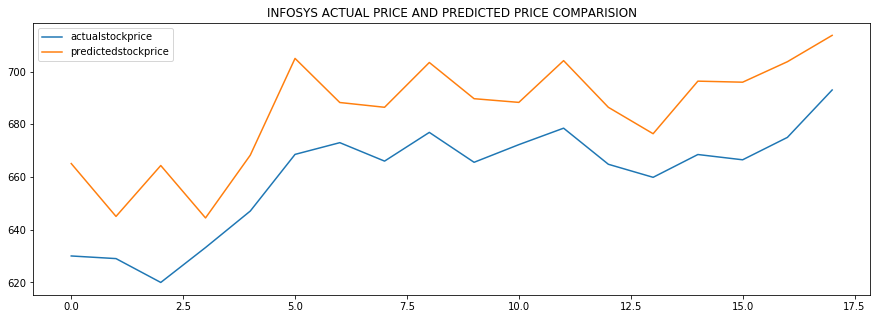

In [330]:
plt.figure(figsize = (15,5))
plt.plot(test["actualsbiopen"])
plt.plot(test["predicted_random"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("INFOSYS ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# Let's check for june month Dataset.

In [322]:
june_test= pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/infosys/infosys live test.csv"")
june_test

,infosysAdj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,Date,infosys open
0,695.98,5775.0,23301.36,21419.23,9314.95,9412.36,11837.53,25548.27,28-05-20,707.00
1,697.90,5851.1,23132.76,21916.31,9490.10,9368.99,11804.91,25400.64,29-05-20,692.50
2,691.00,5755.1,22961.47,21877.89,9580.30,9489.97,11802.95,25383.11,01-06-20,698.75
3,699.55,5819.2,23732.52,22062.39,9826.15,9552.05,11900.24,25475.02,02-06-20,700.50
4,708.10,5835.1,23995.94,22325.61,9979.10,9608.38,12064.41,25742.65,03-06-20,710.70
5,701.55,5941.6,24325.62,22613.76,10061.55,9682.91,12302.91,26269.89,04-06-20,702.00


In [323]:
X=june_test["infosys open"]

In [324]:
Y=june_test.drop(["Date","infosys open",'aust close'],axis=1)

In [325]:
pred_june = rf.predict(Y)


In [326]:
june_test["predictedinfosysopen"] = pred_june

In [327]:
june_test

,infosysAdj Close,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,nyaClose,dji Close,Date,infosys open,predictedinfosysopen
0,695.98,5775.0,23301.36,21419.23,9314.95,9412.36,11837.53,25548.27,28-05-20,707.00,712.188328
1,697.90,5851.1,23132.76,21916.31,9490.10,9368.99,11804.91,25400.64,29-05-20,692.50,713.968333
2,691.00,5755.1,22961.47,21877.89,9580.30,9489.97,11802.95,25383.11,01-06-20,698.75,713.680001
3,699.55,5819.2,23732.52,22062.39,9826.15,9552.05,11900.24,25475.02,02-06-20,700.50,711.738332
4,708.10,5835.1,23995.94,22325.61,9979.10,9608.38,12064.41,25742.65,03-06-20,710.70,719.086664
5,701.55,5941.6,24325.62,22613.76,10061.55,9682.91,12302.91,26269.89,04-06-20,702.00,711.424994


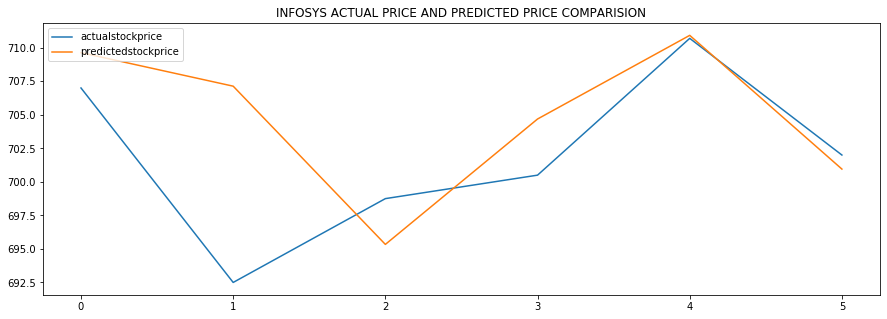

In [87]:
plt.figure(figsize = (15,5))
plt.plot(test1["actual_live_price"])
plt.plot(test1["predicted_live_linear"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("INFOSYS ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# It can be clearly obsevered that predection is getting converged with the actual values.

# The linear works best for prediction:

# ---------------------------------Code ENDS here------------------------------------------------#